**NAME OF THE PROJECT**:recognizing handwritten digits with scikit-learn

**COMPANY**:SUVEN TECHNOLOGY AND CONSULTANTS & pvt.ltd

**AUTHOR**:MOHAMMED ZAKIR NOORAJ

**IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
#all the numbers are stored in images array form
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
main_data = digits['data']
targets = digits['target']
print(len(main_data))

1797


In [5]:
#function to display digit

%matplotlib inline
def show_digit(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('The digit is: '+ str(digits.target[index]))
    plt.show()

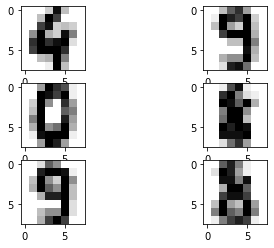

In [21]:
%matplotlib inline

plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')

**BY USING SUPPORT VECTOR MACHINE**

In [9]:
from sklearn import svm
svc = svm.SVC(gamma = 0.001, C=100.)

In [10]:
svc.fit(main_data[:1790] , targets[:1790])

SVC(C=100.0, gamma=0.001)

In [13]:
predictions = svc.predict(main_data[1791:])

In [14]:
predictions , targets[1791:]

(array([4, 9, 0, 8, 9, 8]), array([4, 9, 0, 8, 9, 8]))

**BY USING DECISIONTREE CLASSIFIER**

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(main_data[:1600] , targets[:1600]) # this time we only use 1600 as train and 197 as test

DecisionTreeClassifier()

In [17]:
prediction2 = dt.predict(main_data[1601:])
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
confusion_matrix(targets[1601:], prediction2)

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 13,  1,  0,  1,  0,  0,  2,  0],
       [ 0,  1,  1, 13,  1,  3,  0,  3,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  1,  3,  0,  1],
       [ 0,  0,  0,  1,  3, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0, 16,  0,  1],
       [ 1,  2,  1,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  3,  1, 15]])

In [18]:
accuracy_score(targets[1601:], prediction2)

0.7908163265306123

**BY USING RANDOMFOREST CLASIFIER**

In [19]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators = 150)
rc.fit(main_data[:1500], targets[:1500])

RandomForestClassifier(n_estimators=150)

In [22]:
prediction3= rc.predict(main_data[1501:])
accuracy_score(targets[1501:], prediction3)

0.9155405405405406

**conclusion**:finally we got 91% score accuracy 